In [1]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [88]:
glcm_df = pd.read_csv("glcm_coffee_dataset.csv")

In [89]:
glcm_df.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,3.225539,3.679097,3.835298,4.077126,0.985857,0.981498,0.980730,0.978722,0.427142,0.396329,...,64.822246,0.005439,0.004972,0.004990,0.004823,0.073748,0.070511,0.070639,0.069450,Light Coffee
1,2.774717,3.243531,3.205410,3.458236,0.978049,0.971573,0.971662,0.967321,0.473154,0.438611,...,51.167628,0.007451,0.006865,0.006930,0.006684,0.086321,0.082858,0.083248,0.081755,Light Coffee
2,2.753947,3.221718,3.181865,3.432108,0.978409,0.971973,0.972079,0.967804,0.476367,0.441447,...,50.230946,0.007596,0.007003,0.007083,0.006842,0.087156,0.083684,0.084161,0.082714,Light Coffee
3,2.814796,3.282403,3.237196,3.496530,0.977401,0.970837,0.970965,0.966481,0.468644,0.434920,...,52.441974,0.007361,0.006799,0.006902,0.006642,0.085799,0.082455,0.083080,0.081499,Light Coffee
4,2.797355,3.486976,3.340112,3.342869,0.979160,0.967085,0.969370,0.971399,0.471095,0.430647,...,46.853719,0.007071,0.006433,0.006643,0.006447,0.084089,0.080204,0.081505,0.080293,Light Coffee


In [90]:
glcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dissimilarity_0    241 non-null    float64
 1   dissimilarity_45   241 non-null    float64
 2   dissimilarity_90   241 non-null    float64
 3   dissimilarity_135  241 non-null    float64
 4   correlation_0      241 non-null    float64
 5   correlation_45     241 non-null    float64
 6   correlation_90     241 non-null    float64
 7   correlation_135    241 non-null    float64
 8   homogeneity_0      241 non-null    float64
 9   homogeneity_45     241 non-null    float64
 10  homogeneity_90     241 non-null    float64
 11  homogeneity_135    241 non-null    float64
 12  contrast_0         241 non-null    float64
 13  contrast_45        241 non-null    float64
 14  contrast_90        241 non-null    float64
 15  contrast_135       241 non-null    float64
 16  ASM_0              241 non

In [91]:
label_distr = glcm_df['label'].value_counts()

In [92]:
print(label_distr.index)

Index(['Medium Coffee', 'Extra Dark Coffee', 'Light Coffee', 'Dark Coffee'], dtype='object')


In [97]:
label_name = list(label_distr.index)

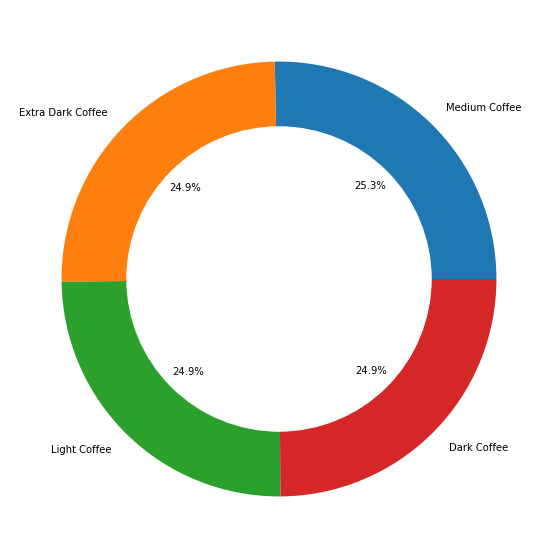

In [98]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Prepdare Dataset

In [99]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Normalization decimal scaling

In [163]:
def train_decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    print(c)
    return data/(10**c)


In [164]:
def test_decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    c = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1])
    return data/(10**c)


In [156]:
X = glcm_df[['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135', 
                     'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135', 
                     'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135', 
                     'contrast_0', 'contrast_45', 'contrast_90', 'contrast_135', 
                     'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135',
                     'energy_0', 'energy_45', 'energy_90', 'energy_135']].values

In [157]:
len(X)

241

#### Label encoding & categoricalize output vector

In [158]:
le = LabelEncoder()
le.fit(glcm_df["label"].values)
le.classes_

array(['Dark Coffee', 'Extra Dark Coffee', 'Light Coffee',
       'Medium Coffee'], dtype=object)

In [159]:
print(le.classes_)

['Dark Coffee' 'Extra Dark Coffee' 'Light Coffee' 'Medium Coffee']


In [160]:
Y = le.transform(glcm_df['label'].values)
Y = to_categorical(Y)

#### Split dataset

In [161]:
X_train, X_test, y_train, y_test = \
                    train_test_split(X, 
                                     Y, 
                                     test_size=0.25, 
                                     random_state=42)
  
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(180, 24) 	 (61, 24) 	 (180, 4) 	 (61, 4)


In [165]:
X_train = train_decimal_scaling(X_train)
X_test = test_decimal_scaling(X_test)        

[1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1]


### Build Neural Network Model

In [166]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation

import keras
from keras import backend as K

In [167]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [168]:
def nn_model(max_len):
    
    model = Sequential()
    model.add(Dense(32, 
                    activation="elu",
                    input_shape=(max_len,)))
#     model.add(Dense(1024, activation="elu"))
#     model.add(Dense(512, activation="elu"))
#     model.add(Dense(256, activation="elu"))
    model.add(Dense(128, activation="elu"))
    model.add(Dense(4))
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

In [169]:
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val,y_val))
    return hist 

In [181]:
max_len = X_train.shape[1]  

EPOCHS = 800
BATCH_SIZE = 32

model = nn_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                800       
_________________________________________________________________
dense_37 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 516       
_________________________________________________________________
activation_11 (Activation)   (None, 4)                 0         
Total params: 5,540
Trainable params: 5,540
Non-trainable params: 0
_________________________________________________________________
Train on 180 samples, validate on 61 samples
Epoch 1/800
180/180 [==============================] - 1s 5ms/step - loss: 1.3802 - accuracy: 0.2278 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3620 - val_accuracy: 0.2131 - val_precision:

## Save Model

In [182]:
model.save("model_coffee_bean.h5")

## Evaluate Model

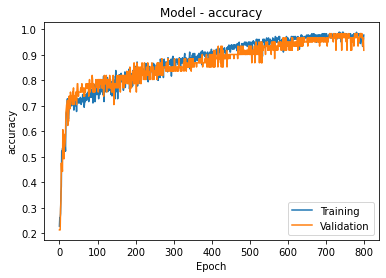

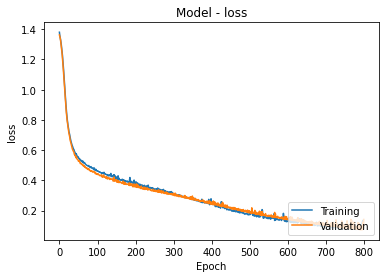

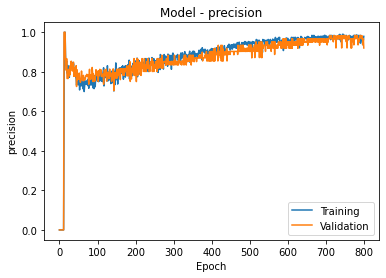

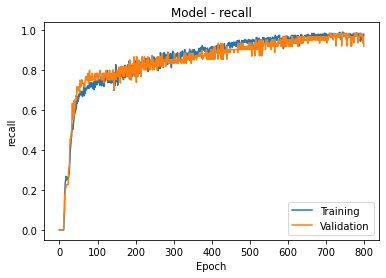

In [183]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model_(history)

In [184]:
import json

def save_to_json(Data, json_filename):
    with open(json_filename, mode='w') as json_config:
        json.dump(str(Data), json_config)
save_to_json(history.history, "model_history.json")
#history.history

In [185]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

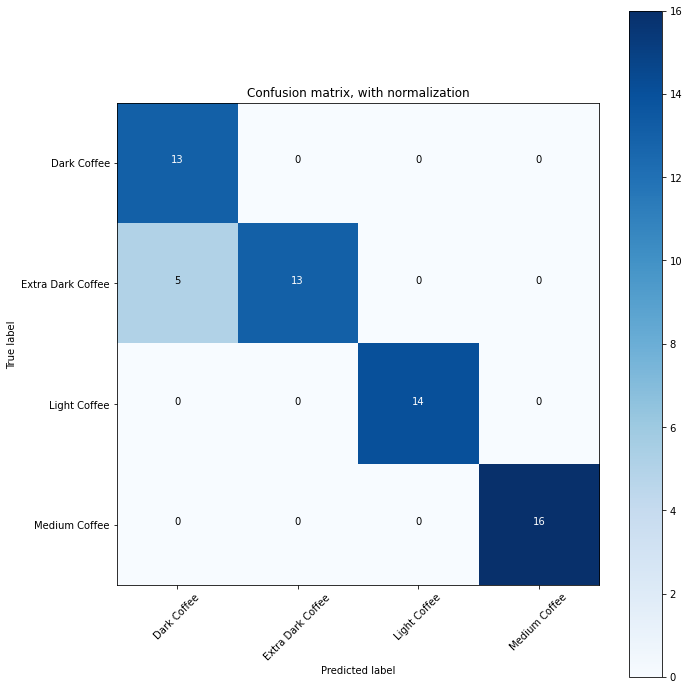

In [186]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      classes=le.classes_,
                      normalize=False,
                      title='Confusion matrix, with normalization')


In [187]:
report = classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=le.classes_)
print(report)

                   precision    recall  f1-score   support

      Dark Coffee       0.72      1.00      0.84        13
Extra Dark Coffee       1.00      0.72      0.84        18
     Light Coffee       1.00      1.00      1.00        14
    Medium Coffee       1.00      1.00      1.00        16

         accuracy                           0.92        61
        macro avg       0.93      0.93      0.92        61
     weighted avg       0.94      0.92      0.92        61



In [188]:
report = classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names = le.classes_, 
                            output_dict = True)
df = pd.DataFrame(report).transpose()

In [189]:
df.to_csv("report_coffee_bean.csv")

In [190]:
df = pd.read_csv("report_coffee_bean.csv")
macro_avg = df.loc[df.iloc[:,0] == "macro avg"]
macro_avg_dict = dict(macro_avg)

In [191]:
macro_avg

,Unnamed: 0,precision,recall,f1-score,support
5,macro avg,0.930556,0.930556,0.919355,61.0
